**Introduction(Although it doesn't need any)**
  
  (**The Visualization are updated every 24 Hours**)

![](https://encrypted-tbn0.gstatic.com/images?q=tbn%3AANd9GcQkE_N7Ke9m5cfVtXExfh9t0EEcQqOl4sHAMKYtcUZzr8Pb_k3g)  


**COVID-19 is wreaking havoc across the india!!!


In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# Any results you write to the current directory are saved as output.

/kaggle/input/per-day-cases/per_day_cases.xlsx
/kaggle/input/covid19-in-india/StatewiseTestingDetails.csv
/kaggle/input/covid19-in-india/ICMRTestingDetails.csv
/kaggle/input/covid19-in-india/covid_19_india.csv
/kaggle/input/covid19-in-india/HospitalBedsIndia.csv
/kaggle/input/covid19-in-india/IndividualDetails.csv
/kaggle/input/covid19-in-india/AgeGroupDetails.csv
/kaggle/input/covid19-in-india/ICMRTestingLabs.csv
/kaggle/input/covid19-in-india/population_india_census2011.csv
/kaggle/input/indian-coordinates/Indian Coordinates.csv


In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.io as pio
pio.templates.default="plotly_dark"
from plotly.subplots import make_subplots
import plotly.graph_objs as go

from plotly.offline import init_notebook_mode,iplot
from plotly.offline import download_plotlyjs,init_notebook_mode,plot,iplot
import warnings
warnings.filterwarnings('ignore')

In [3]:
testinglab=pd.read_csv('/kaggle/input/covid19-in-india/ICMRTestingLabs.csv',encoding='utf-8')
testinglab.head()

,lab,address,pincode,city,state,type
0,"ICMR-Regional Medical Research Centre, Port Blair","ICMR-Regional Medical Research Centre, Post Ba...",744103,Port Blair,Andaman and Nicobar Islands,Government Laboratory Supported
1,Tomo Riba Institute of Health & Medical Scienc...,"National Highway 52A, Old Assembly Complex, Na...",791110,Naharlagun,Arunachal Pradesh,Collection Site
2,Sri Venkateswara Institute of Medical Sciences...,Sri Venkateswara Institute of Medical Sciences...,517507,Tirupati,Andhra Pradesh,Government Laboratory Supported
3,"Rangaraya Medical College, Kakinada","Rangaraya Medical College, Kakinada Pithampura...",533001,Kakinada,Andhra Pradesh,Government Laboratory Supported
4,"Sidhartha Medical College, Vijaywada","Siddhartha Medical College, Vijayawada NH 16 S...",520008,Vijayawada,Andhra Pradesh,Government Laboratory Supported


In [4]:
India_coor=pd.read_csv('/kaggle/input/indian-coordinates/Indian Coordinates.csv')
India_coor.head()

,Name of State / UT,Latitude,Longitude,Unnamed: 3
0,Andaman And Nicobar,11.667026,92.735983,NaN
1,Andhra Pradesh,14.750429,78.570026,NaN
2,Arunachal Pradesh,27.100399,93.616601,NaN
3,Assam,26.749981,94.216667,NaN
4,Bihar,25.785414,87.479973,NaN


In [5]:
testinglab.type.unique()

array(['Government Laboratory Supported', 'Collection Site',
       'Private Laboratory', 'Government Laboratory Suitable'],
      dtype=object)

In [6]:
testinglab['type'].count()

232

In [7]:
testinglab.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 232 entries, 0 to 231
Data columns (total 6 columns):
lab        232 non-null object
address    232 non-null object
pincode    232 non-null int64
city       232 non-null object
state      232 non-null object
type       232 non-null object
dtypes: int64(1), object(5)
memory usage: 11.0+ KB


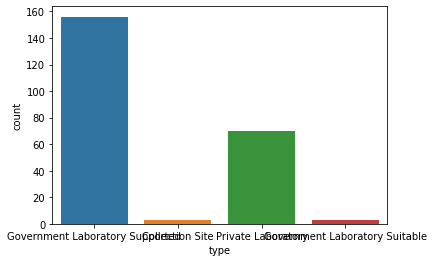

In [8]:
sns.countplot(x=testinglab['type'],data=testinglab)

In [9]:
dbd_India=pd.read_excel('/kaggle/input/per-day-cases/per_day_cases.xlsx',sheet_name='India')
dbd_India.head()
dbd_Italy=pd.read_excel('/kaggle/input/per-day-cases/per_day_cases.xlsx',sheet_name='Italy')
dbd_Italy.head()
dbd_Korea=pd.read_excel('/kaggle/input/per-day-cases/per_day_cases.xlsx',sheet_name='Korea')

dbd_Korea.head()

,Date,Total Cases,New Cases,Days after surpassing 100 cases
0,2020-01-20,1,1,NaN
1,2020-01-21,1,0,NaN
2,2020-01-22,1,0,NaN
3,2020-01-23,1,0,NaN
4,2020-01-24,2,1,NaN


In [10]:
India_coor.rename(columns={
    'Name of State / UT':'state',
    'Latitude':'lat',
    'Longitude':'long'
},inplace=True)

In [11]:
testinglab_full=pd.merge(testinglab,India_coor,on='state')
testinglab_full

,lab,address,pincode,city,state,type,lat,long,Unnamed: 3
0,Sri Venkateswara Institute of Medical Sciences...,Sri Venkateswara Institute of Medical Sciences...,517507,Tirupati,Andhra Pradesh,Government Laboratory Supported,14.750429,78.570026,NaN
1,"Rangaraya Medical College, Kakinada","Rangaraya Medical College, Kakinada Pithampura...",533001,Kakinada,Andhra Pradesh,Government Laboratory Supported,14.750429,78.570026,NaN
2,"Sidhartha Medical College, Vijaywada","Siddhartha Medical College, Vijayawada NH 16 S...",520008,Vijayawada,Andhra Pradesh,Government Laboratory Supported,14.750429,78.570026,NaN
3,"Government Medical College, Anantapur","Government Medical College, Anantapur, Rahamat...",515001,Anantapur,Andhra Pradesh,Government Laboratory Supported,14.750429,78.570026,NaN
4,"Guntur Medical College, Guntur","Guntur Medical College, Guntur Kanna Vari Thot...",522004,Guntur,Andhra Pradesh,Government Laboratory Supported,14.750429,78.570026,NaN
...,...,...,...,...,...,...,...,...,...
163,"RML Mehrotra Pathology Pvt Ltd., Lucknow","RML Mehrotra Pathology Pvt Ltd., A-21/A, Niral...",226020,Lucknow,Uttar Pradesh,Private Laboratory,27.599981,78.050006,NaN
164,"Department of Laboratory Medicine, Jaypee Hosp...","Department of Laboratory Medicine, Jaypee Hosp...",201304,Noida,Uttar Pradesh,Private Laboratory,27.599981,78.050006,NaN
165,"Government Medical College, Haldwani","Government Medical College, Rampur Rd, Rampur,...",263129,Haldwani,Uttarakhand,Government Laboratory Supported,30.320409,78.050006,NaN
166,All India Institute of Medical Sciences (AIIMS...,All India Institute of Medical Sciences (AIIMS...,249203,Rishikesh,Uttarakhand,Government Laboratory Supported,30.320409,78.050006,NaN


**Visualization of AgeGroup with Total cases and Percentage**

In [12]:
train=pd.read_csv('/kaggle/input/covid19-in-india/AgeGroupDetails.csv')
train.head()

,Sno,AgeGroup,TotalCases,Percentage
0,1,0-9,22,3.18%
1,2,10-19,27,3.90%
2,3,20-29,172,24.86%
3,4,30-39,146,21.10%
4,5,40-49,112,16.18%


In [13]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 4 columns):
Sno           10 non-null int64
AgeGroup      10 non-null object
TotalCases    10 non-null int64
Percentage    10 non-null object
dtypes: int64(2), object(2)
memory usage: 448.0+ bytes


In [14]:
x=train.groupby('AgeGroup')['TotalCases'].sum().sort_values(ascending=False).to_frame()
x.style.background_gradient(cmap='Blues')

,TotalCases
AgeGroup,
20-29,172
30-39,146
40-49,112
60-69,89
50-59,77
70-79,28
10-19,27
0-9,22
>=80,10


In [15]:
fig=px.bar(train[['AgeGroup','TotalCases']].sort_values('TotalCases',ascending=False),y='TotalCases',x='AgeGroup',color='TotalCases',log_y=False,template='ggplot2',title='AgeGroup vs total cases')
fig.show()

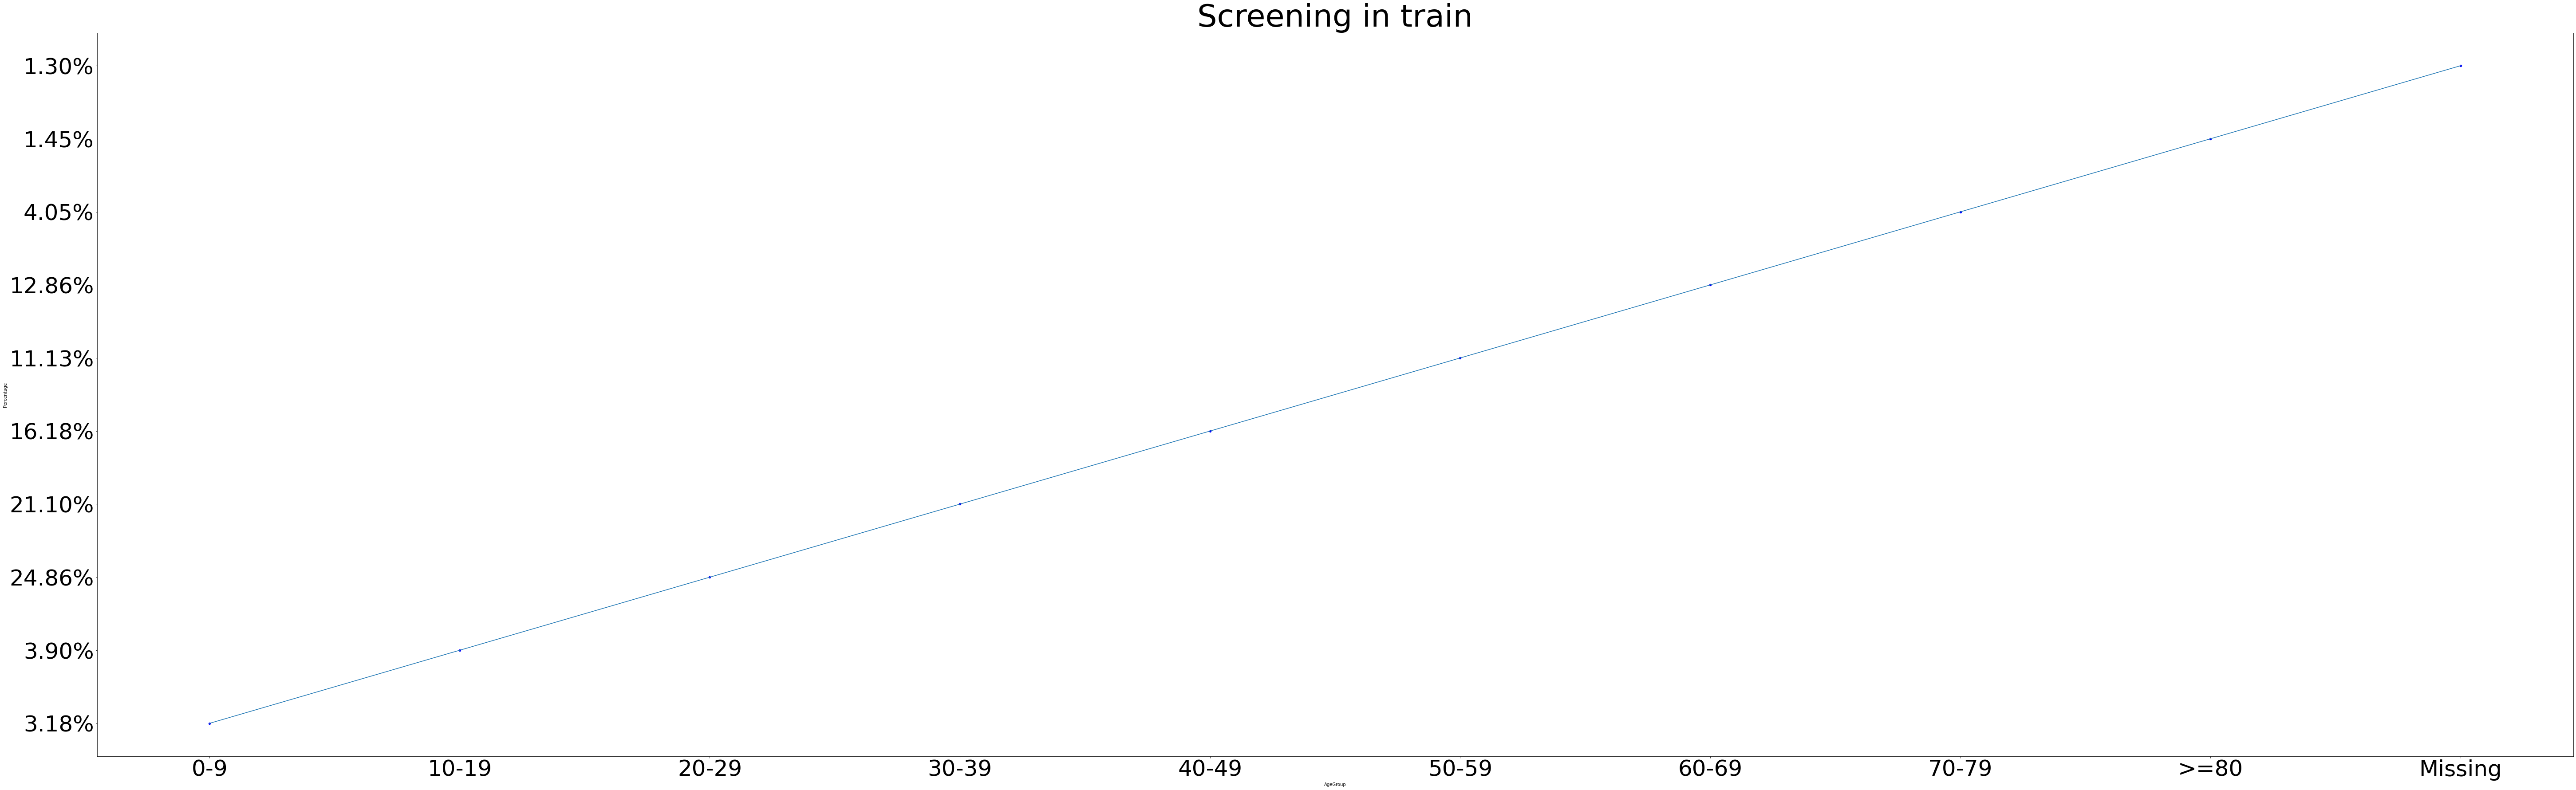

In [16]:
import seaborn as sns
f, ax = plt.subplots(figsize=(100, 30))
ax=sns.scatterplot(x="AgeGroup", y="Percentage", data=train,
             color="blue")
plt.plot(train.AgeGroup,train.Percentage,zorder=1)
plt.xticks(fontsize=50)
plt.yticks(fontsize=50)
plt.title('Screening in train',fontsize=70)
plt.show()


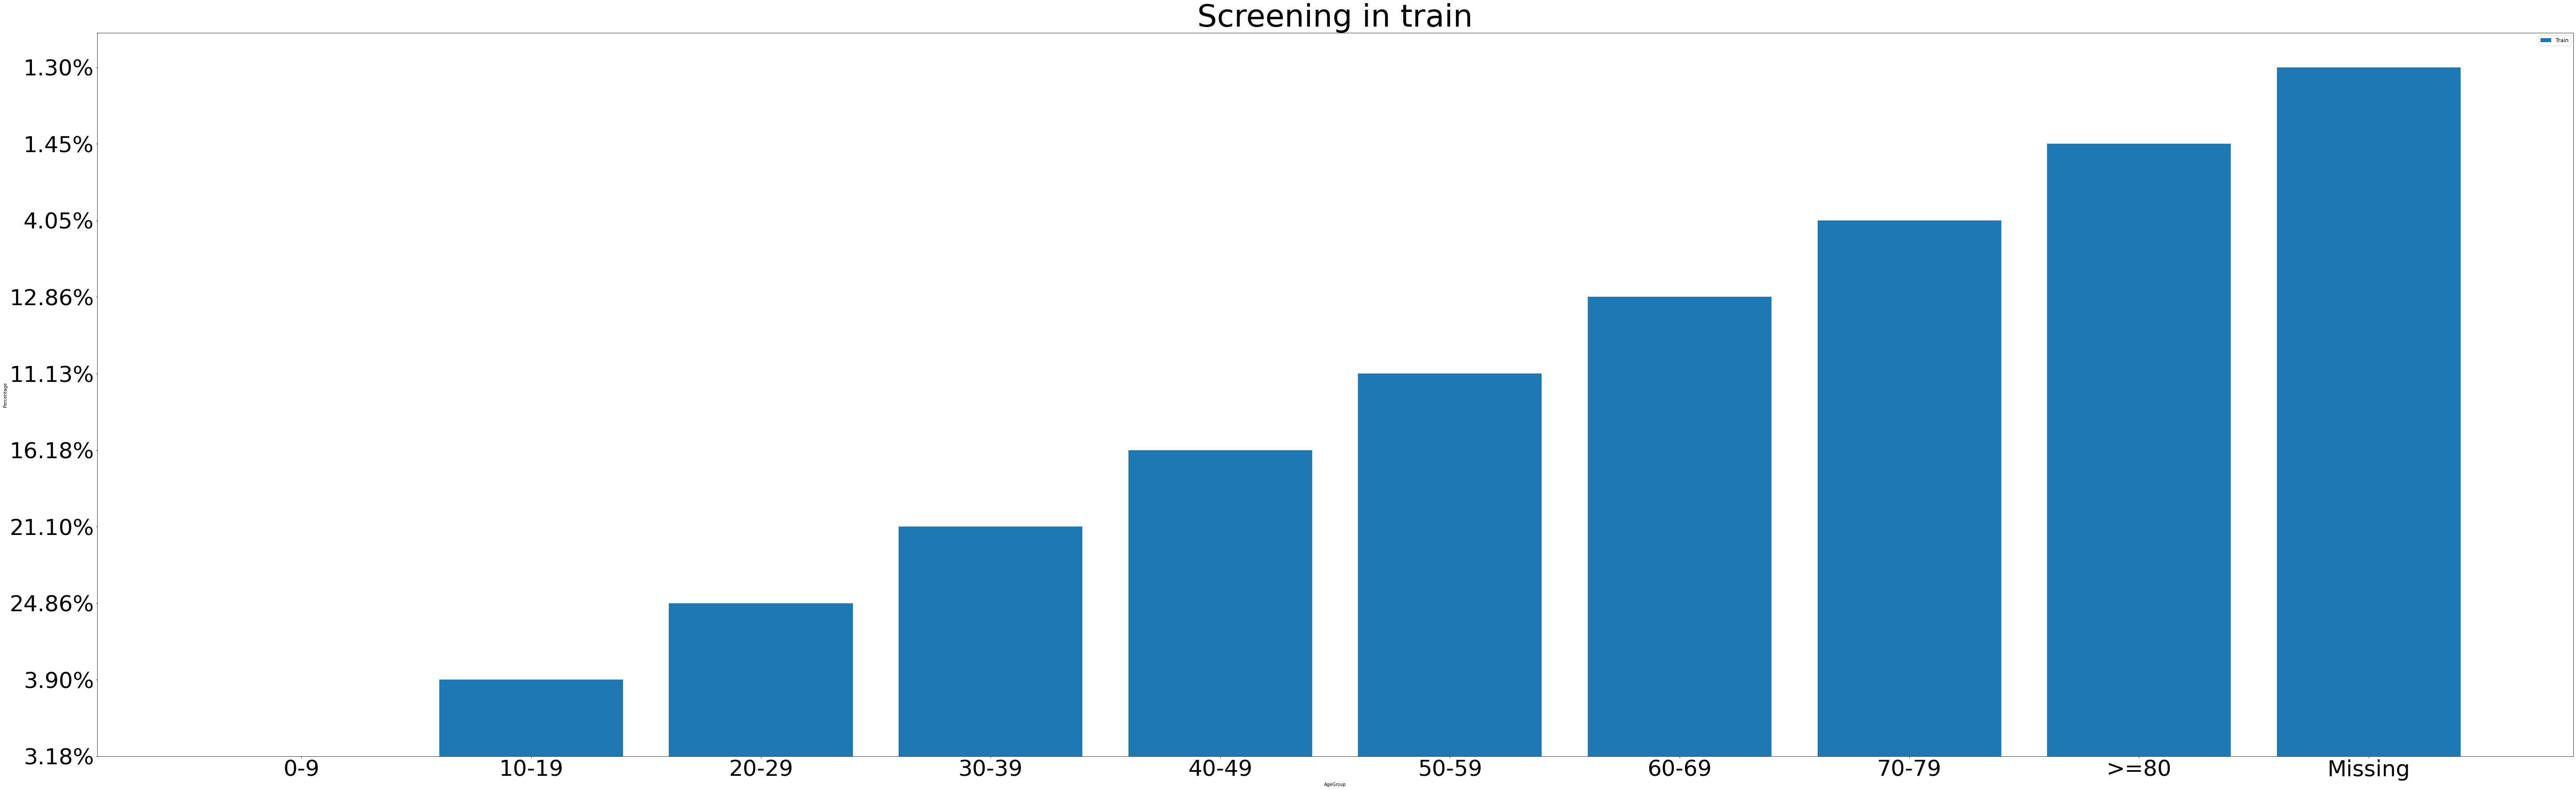

In [17]:
plt.figure(figsize=(100,30))
plt.bar(train.AgeGroup, train.Percentage,label="Train")
plt.xlabel('AgeGroup')
plt.ylabel("Percentage")
plt.xticks(fontsize=50)
plt.yticks(fontsize=50)
plt.title('Screening in train',fontsize=70)
plt.legend(frameon=True, fontsize=12)
plt.show()

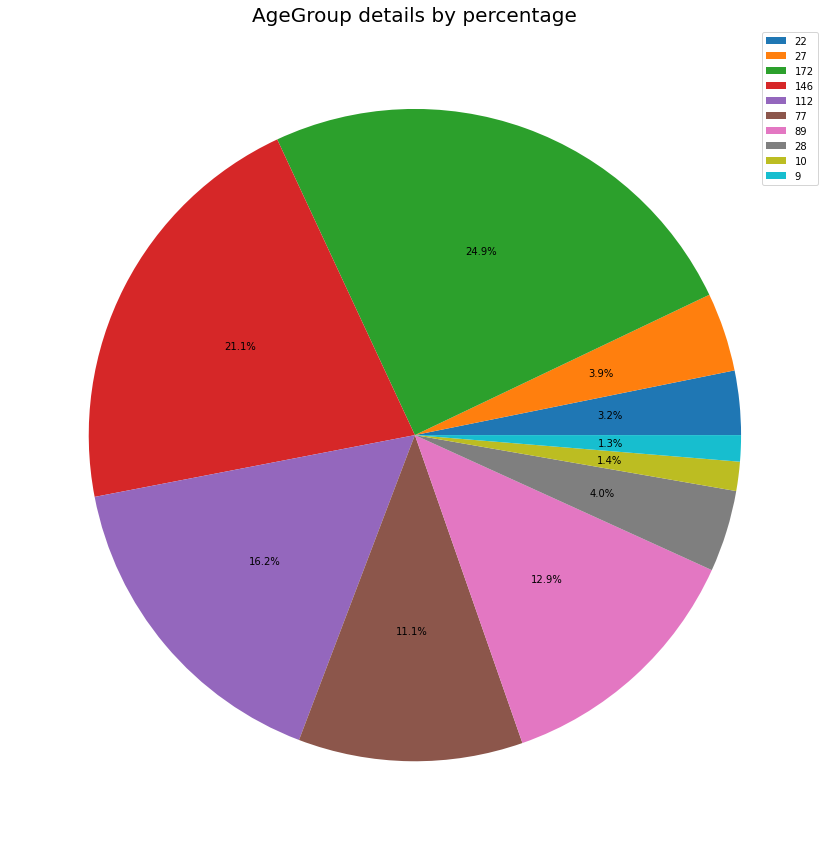

In [18]:
plt.figure(figsize=(15,15))
plt.title('AgeGroup details by percentage',fontsize=20)
plt.pie(train['TotalCases'],autopct='%1.1f%%')
plt.legend(train['TotalCases'],loc='best')
plt.show()

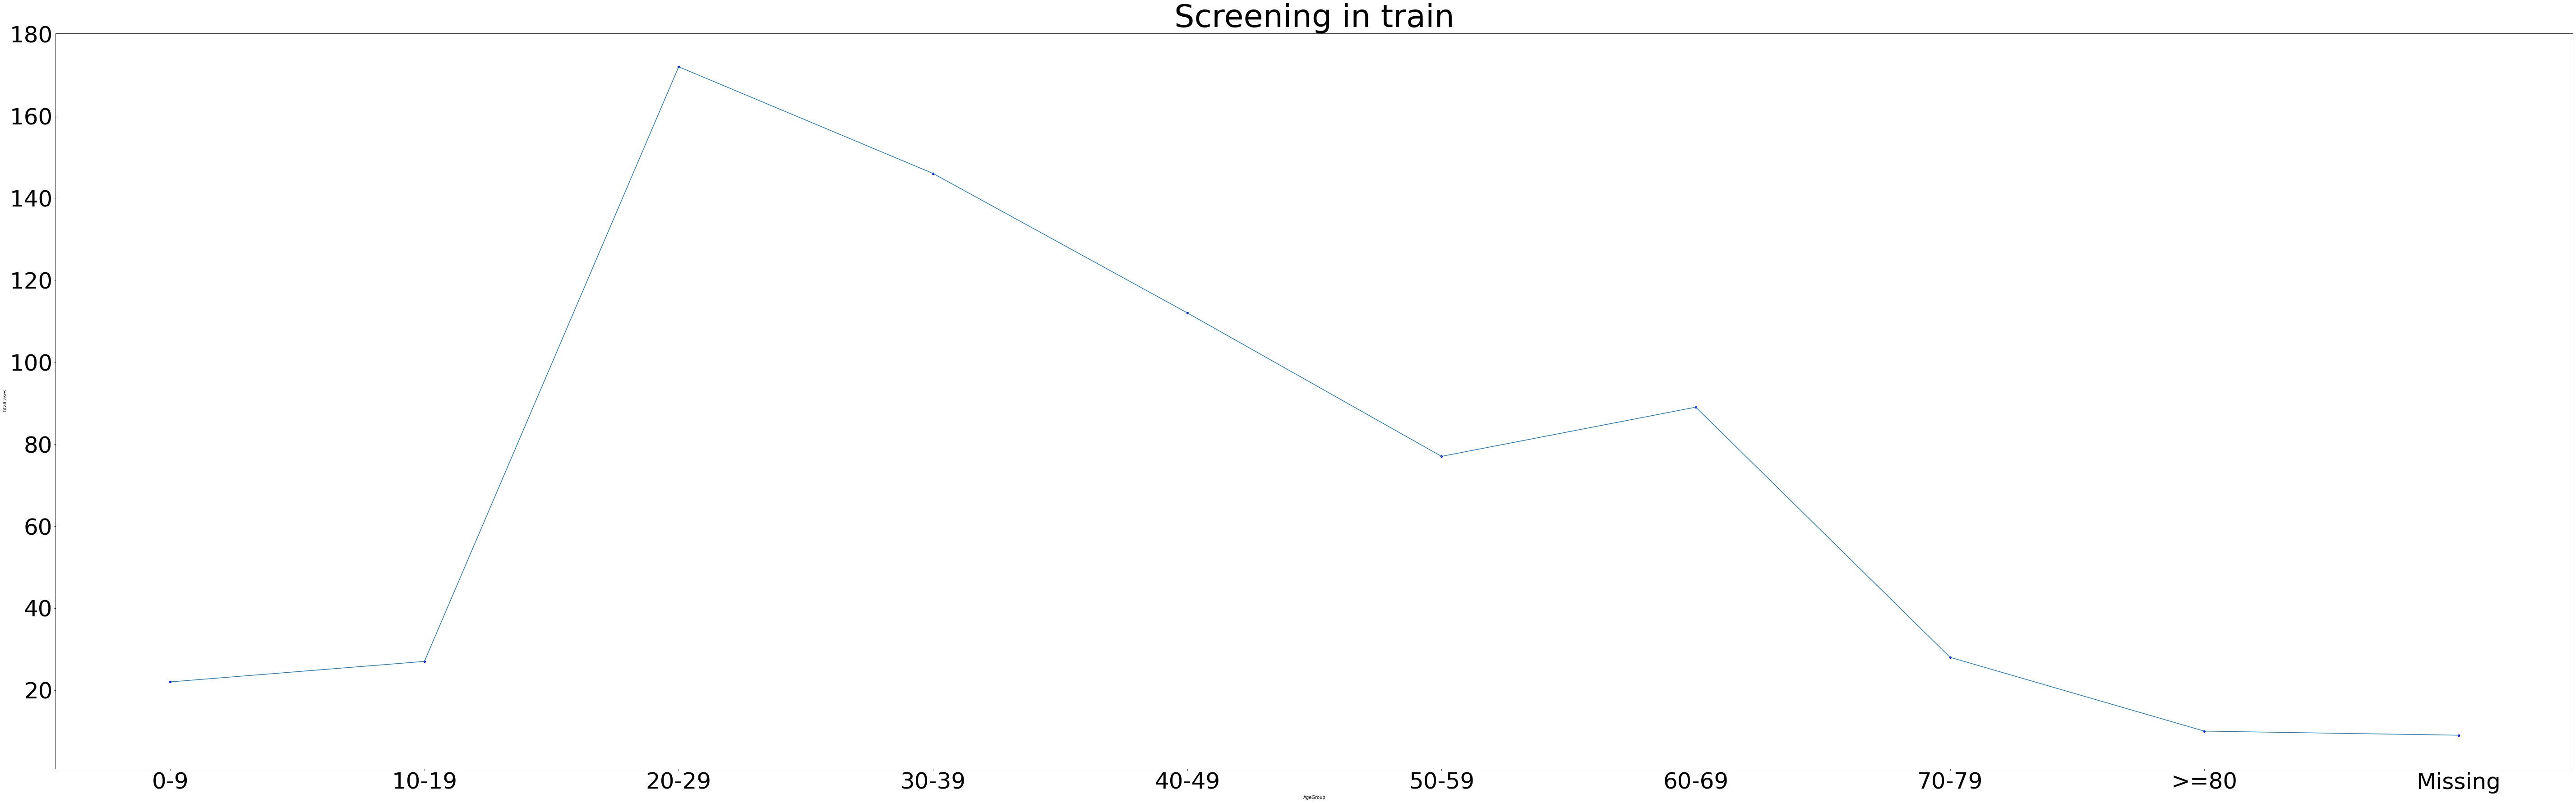

In [19]:
f, ax = plt.subplots(figsize=(100, 30))
ax=sns.scatterplot(x="AgeGroup", y="TotalCases", data=train,
             color="blue")
plt.plot(train.AgeGroup,train.TotalCases,zorder=1)
plt.xticks(fontsize=50)
plt.yticks(fontsize=50)
plt.title('Screening in train',fontsize=70)
plt.show()


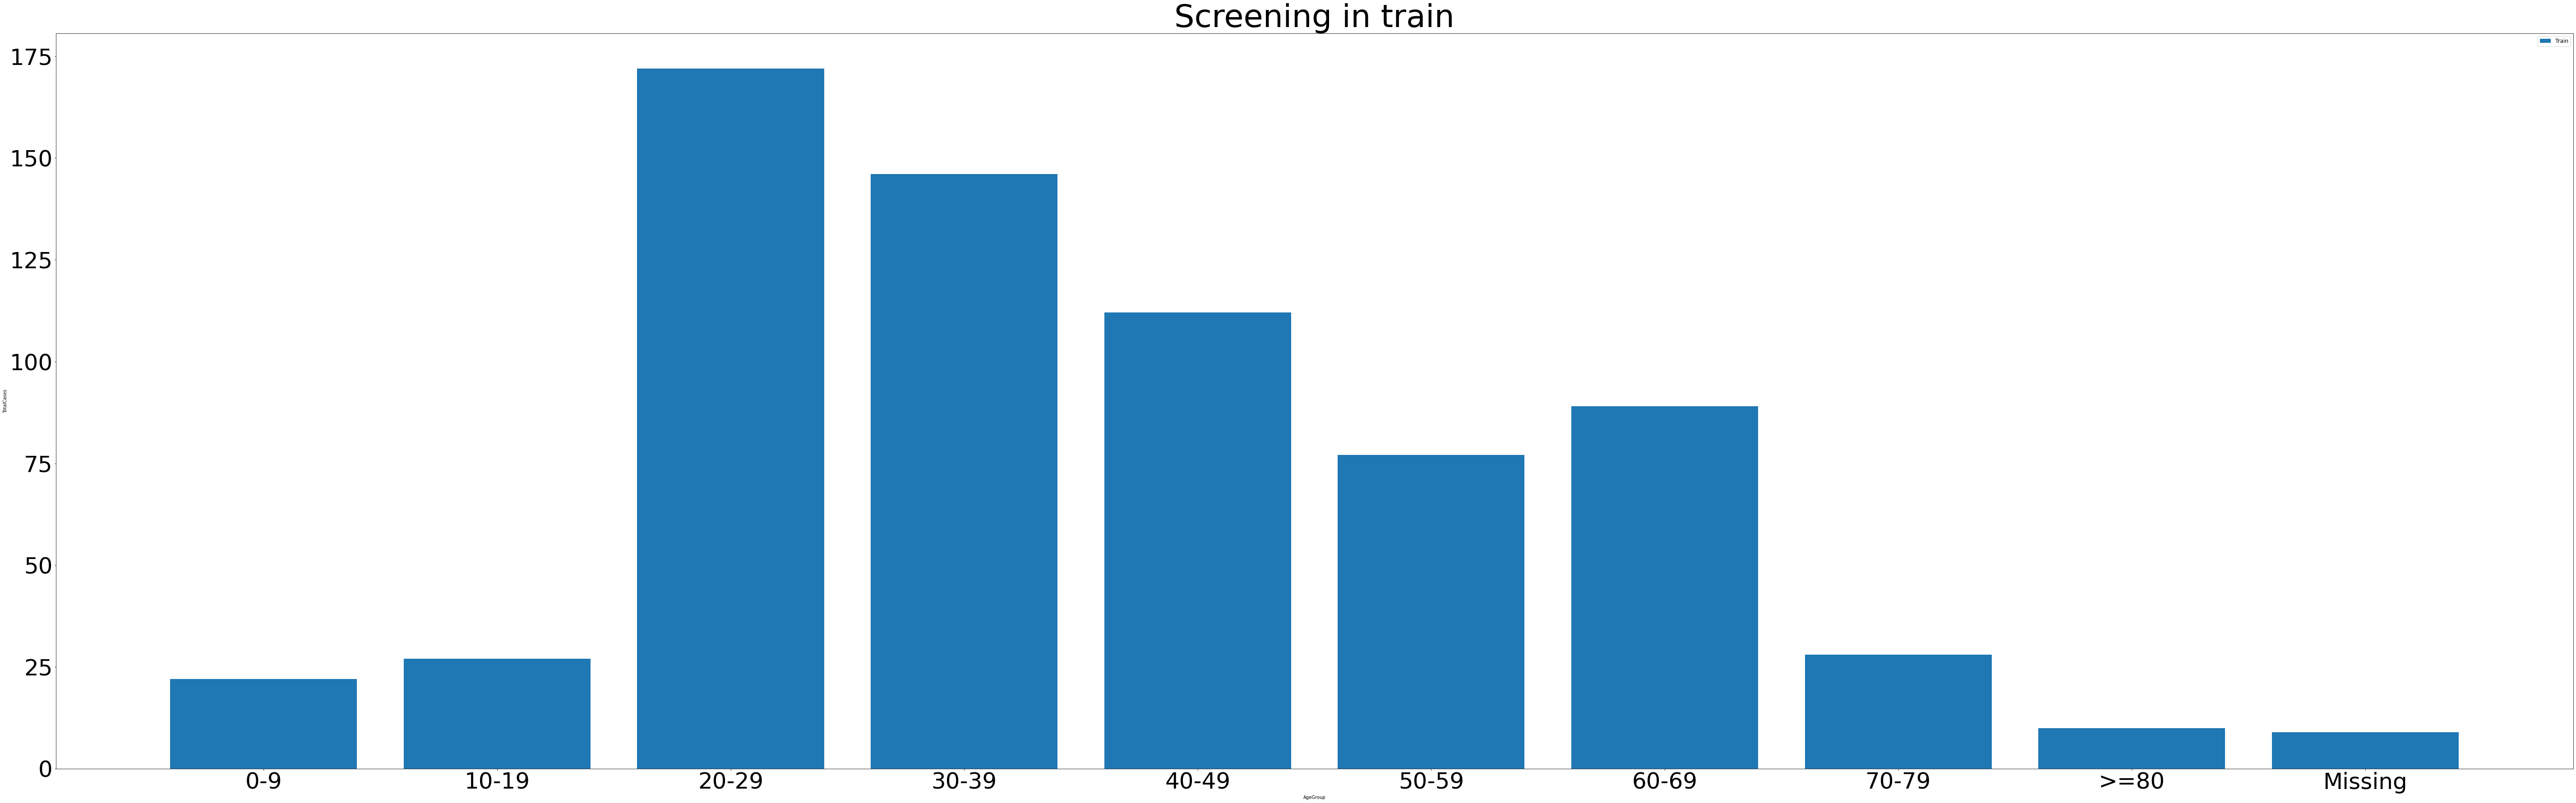

In [20]:
plt.figure(figsize=(100,30))
plt.bar(train.AgeGroup, train.TotalCases,label="Train")
plt.xlabel('AgeGroup')
plt.ylabel("TotalCases")
plt.xticks(fontsize=50)
plt.yticks(fontsize=50)
plt.title('Screening in train',fontsize=70)
plt.legend(frameon=True, fontsize=12)
plt.show()

**ICMRTesting Visualization**

In [21]:
test=pd.read_csv('/kaggle/input/covid19-in-india/ICMRTestingDetails.csv')
test.head(9)

,SNo,DateTime,TotalSamplesTested,TotalIndividualsTested,TotalPositiveCases,Source
0,1,13/03/20 18:00,6500.0,5900.0,78.0,Press_Release_ICMR_13March2020.pdf
1,2,18/03/20 18:00,13125.0,12235.0,150.0,ICMR_website_update_18March_6PM_IST.pdf
2,3,19/03/20 18:00,14175.0,13285.0,182.0,ICMR_website_update_19March_6PM_IST.pdf
3,4,20/03/20 18:00,15404.0,14514.0,236.0,ICMR_website_update_20March_6PM_IST.pdf
4,5,21/03/20 18:00,16911.0,16021.0,315.0,ICMR_website_update_21March_6PM_IST.pdf
5,6,22/03/20 18:00,18127.0,17237.0,396.0,ICMR_website_update_22March_6PM_IST.pdf
6,7,23/03/20 20:00,20707.0,19817.0,471.0,ICMR_website_update_23March_8PM_IST.pdf
7,8,24/03/20 20:00,22694.0,21804.0,536.0,ICMR_website_update_24March_8PM_IST.pdf
8,9,25/03/20 20:00,25144.0,24254.0,581.0,ICMR_website_update_25March_8PM_IST.pdf


In [22]:
test.columns

Index(['SNo', 'DateTime', 'TotalSamplesTested', 'TotalIndividualsTested',
       'TotalPositiveCases', 'Source'],
      dtype='object')

In [23]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28 entries, 0 to 27
Data columns (total 6 columns):
SNo                       28 non-null int64
DateTime                  28 non-null object
TotalSamplesTested        25 non-null float64
TotalIndividualsTested    14 non-null float64
TotalPositiveCases        23 non-null float64
Source                    9 non-null object
dtypes: float64(3), int64(1), object(2)
memory usage: 1.4+ KB


In [24]:
test.drop(['Source'],axis=1,inplace=True)

In [25]:
test.head(9)

,SNo,DateTime,TotalSamplesTested,TotalIndividualsTested,TotalPositiveCases
0,1,13/03/20 18:00,6500.0,5900.0,78.0
1,2,18/03/20 18:00,13125.0,12235.0,150.0
2,3,19/03/20 18:00,14175.0,13285.0,182.0
3,4,20/03/20 18:00,15404.0,14514.0,236.0
4,5,21/03/20 18:00,16911.0,16021.0,315.0
5,6,22/03/20 18:00,18127.0,17237.0,396.0
6,7,23/03/20 20:00,20707.0,19817.0,471.0
7,8,24/03/20 20:00,22694.0,21804.0,536.0
8,9,25/03/20 20:00,25144.0,24254.0,581.0


In [26]:
fig=px.bar(test[['DateTime','TotalPositiveCases']].sort_values('TotalPositiveCases',ascending=False),y='TotalPositiveCases',x='DateTime',color='TotalPositiveCases',log_y=False,template='ggplot2',title='TotalPositiveCases w.r.t DateTime')
fig.show()
fig=px.bar(test[['DateTime','TotalSamplesTested']].sort_values('TotalSamplesTested',ascending=False),y='TotalSamplesTested',x='DateTime',color='TotalSamplesTested',log_y=False,template='ggplot2',title='TotalSamplesTested w.r.t DateTime')
fig.show()
fig=px.bar(test[['DateTime','TotalIndividualsTested']].sort_values('TotalIndividualsTested',ascending=False),y='TotalIndividualsTested',x='DateTime',color='TotalIndividualsTested',log_y=False,template='ggplot2',title='TotalIndividualsTested w.r.t DateTime')
fig.show()


In [27]:
x=test.groupby('DateTime')['TotalSamplesTested'].sum().sort_values(ascending=False).to_frame()
x.style.background_gradient(cmap='Blues')

,TotalSamplesTested
DateTime,
13/04/20 21:00,217554
12/04/20 21:00,195748
11/04/20 21:00,179374
10/04/20 21:00,161330
09/04/20 21:00,144910
08/04/20 21:00,127919
07/04/20 21:00,114015
06/04/20 21:00,101068
05/04/20 21:00,89534


In [28]:
x=test.groupby('DateTime')['TotalIndividualsTested'].sum().sort_values(ascending=False).to_frame()
x.style.background_gradient(cmap='Blues')

,TotalIndividualsTested
DateTime,
13/04/20 21:00,202551
12/04/20 21:00,181028
11/04/20 21:00,164773
10/04/20 21:00,147034
09/04/20 21:00,130792
25/03/20 20:00,24254
24/03/20 20:00,21804
23/03/20 20:00,19817
22/03/20 18:00,17237


In [29]:
x=test.groupby('TotalSamplesTested')['TotalPositiveCases'].sum().sort_values(ascending=False).to_frame()
x.style.background_gradient(cmap='Blues')

,TotalPositiveCases
TotalSamplesTested,
217554.0,9341
195748.0,8312
179374.0,7703
161330.0,6872
144910.0,5705
127919.0,5114
114015.0,4616
101068.0,4135
89534.0,3554


In [30]:
x=test.groupby('DateTime')['TotalPositiveCases'].sum().sort_values(ascending=False).to_frame()
x.style.background_gradient(cmap='Blues')

,TotalPositiveCases
DateTime,
13/04/20 21:00,9341
12/04/20 21:00,8312
11/04/20 21:00,7703
10/04/20 21:00,6872
09/04/20 21:00,5705
08/04/20 21:00,5114
07/04/20 21:00,4616
06/04/20 21:00,4135
05/04/20 21:00,3554


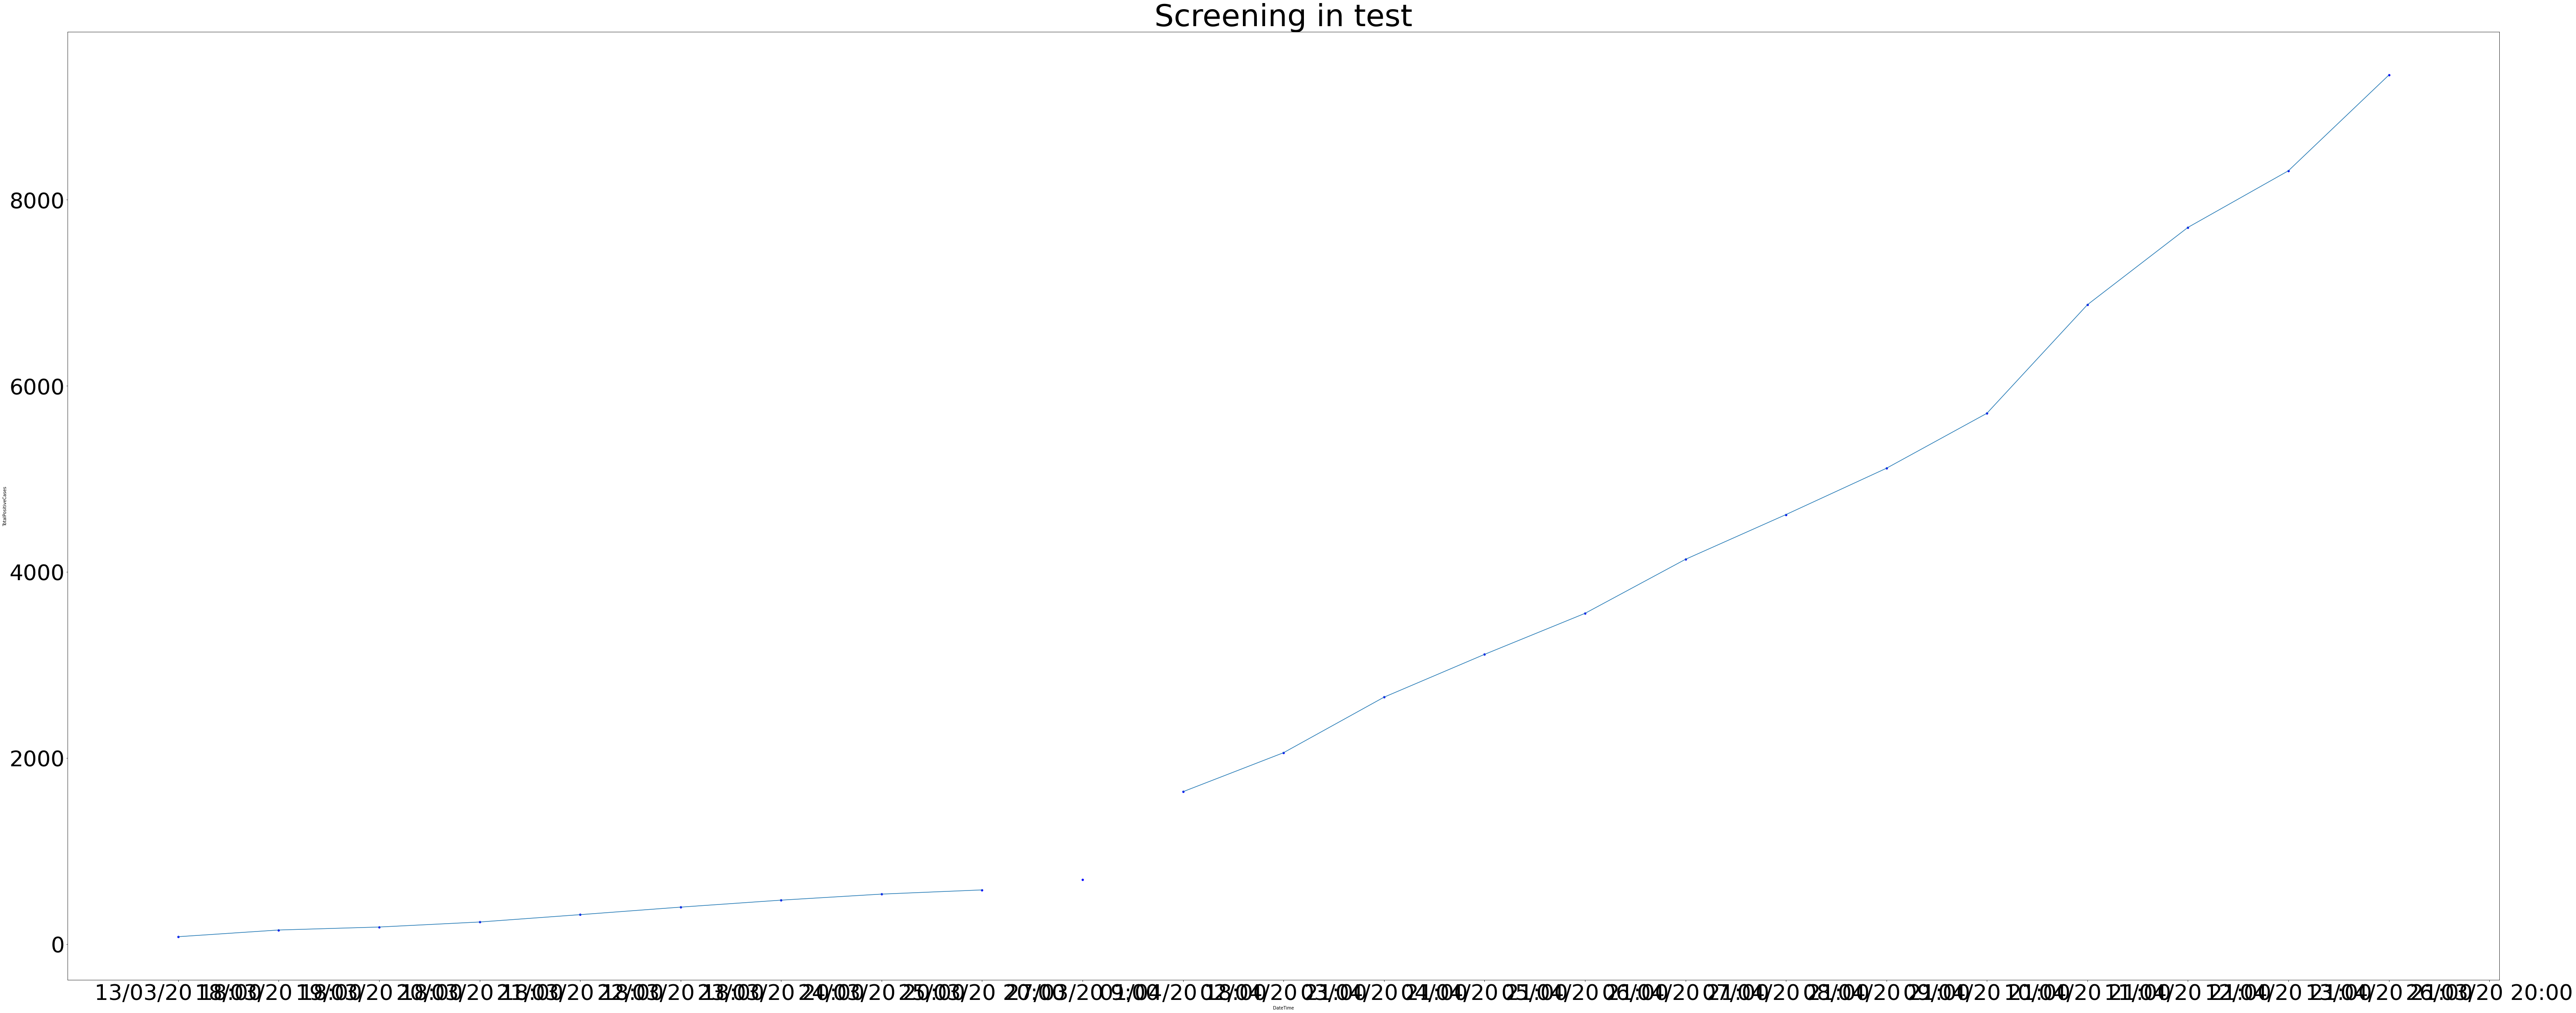

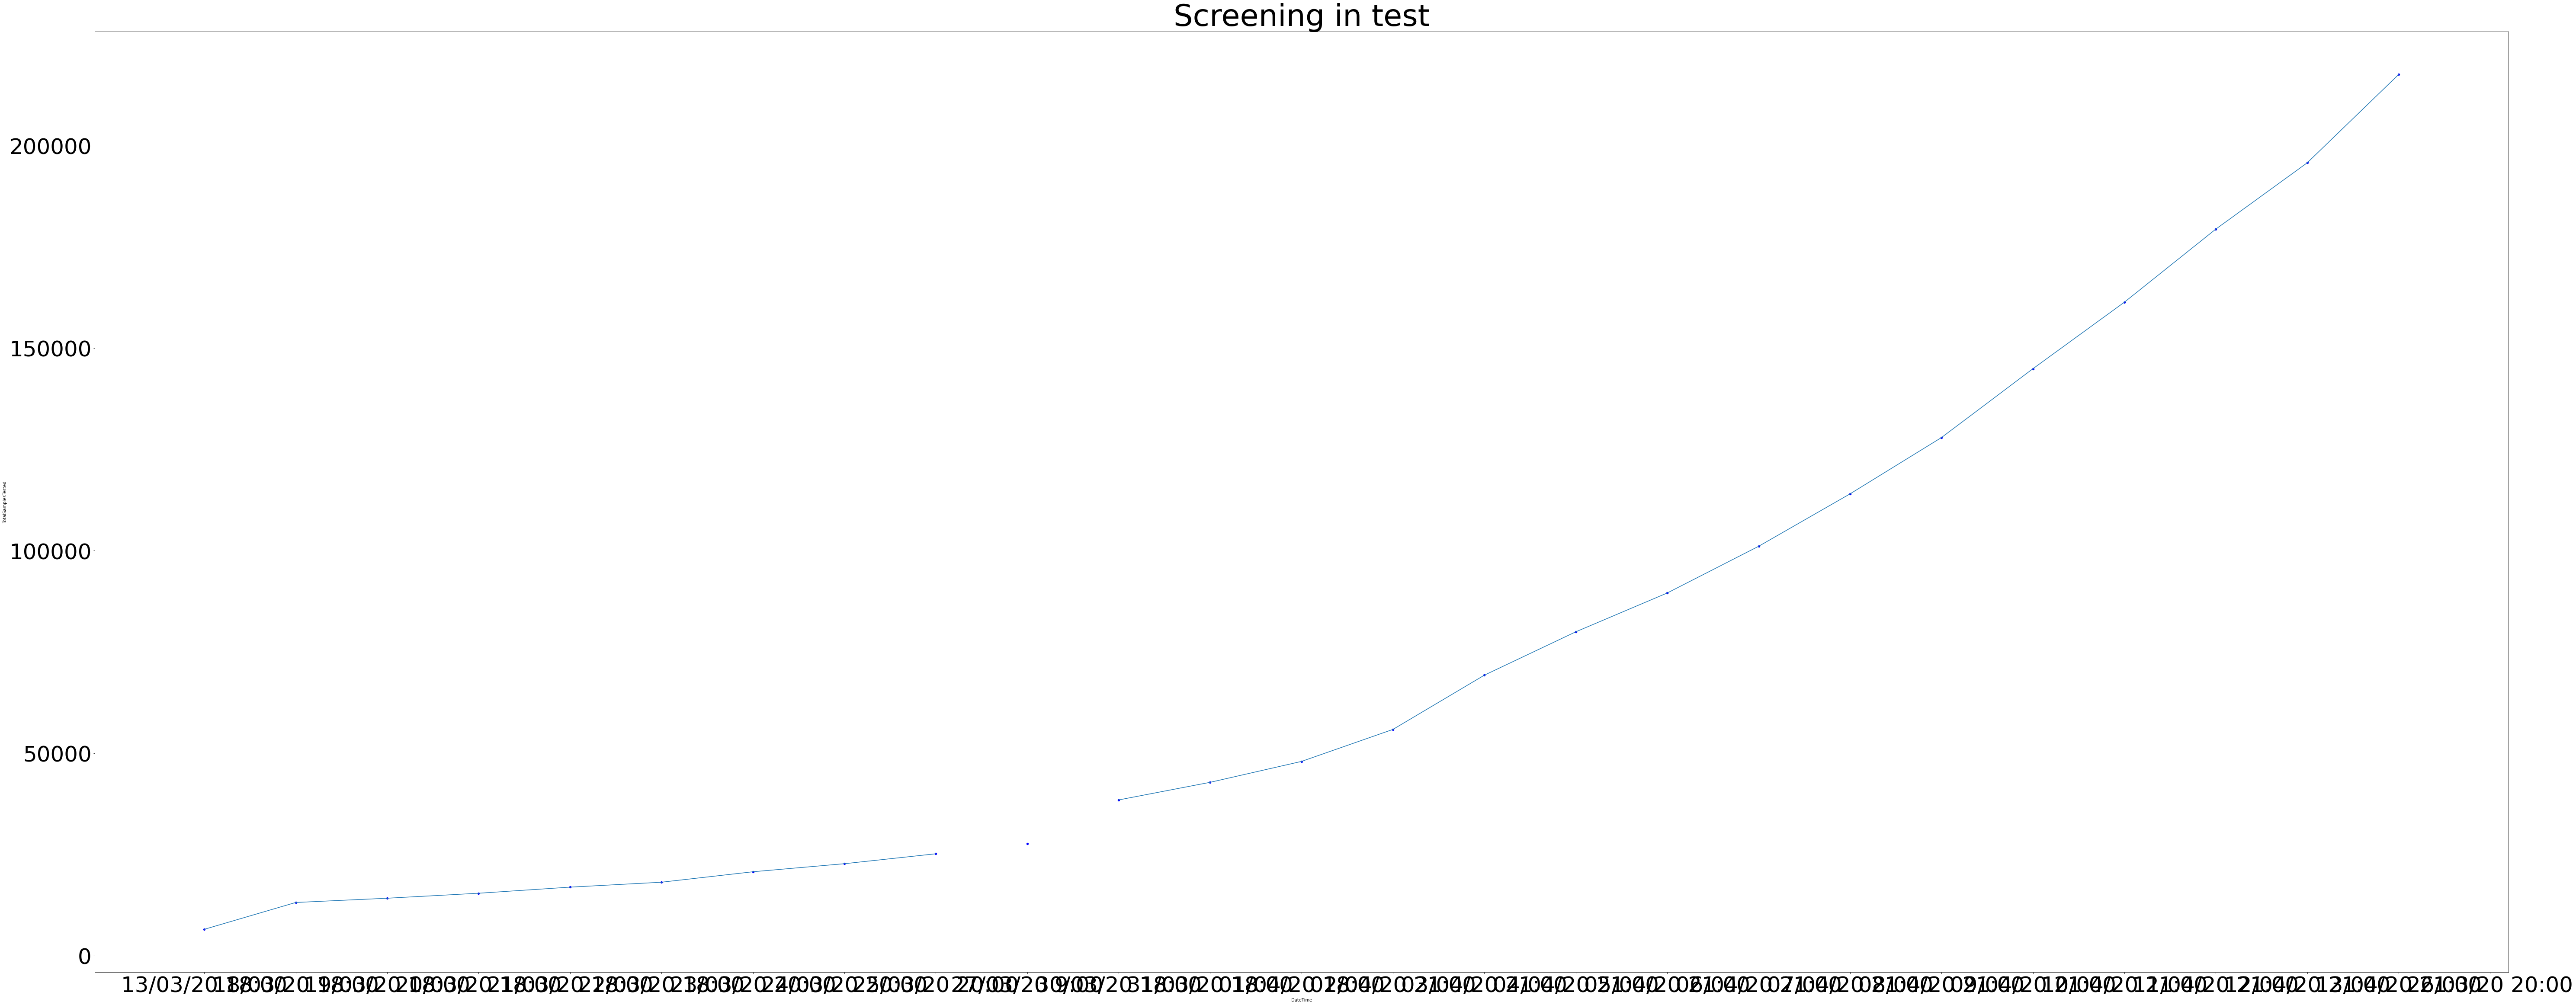

In [31]:
f, ax = plt.subplots(figsize=(100, 40))
ax=sns.scatterplot(x="DateTime", y="TotalPositiveCases", data=test,
             color="blue")
plt.plot(test.DateTime,test.TotalPositiveCases,zorder=1)
plt.xticks(fontsize=50)
plt.yticks(fontsize=50)
plt.title('Screening in test',fontsize=70)
plt.show()
f, ax = plt.subplots(figsize=(100, 40))
ax=sns.scatterplot(x="DateTime", y="TotalSamplesTested", data=test,
             color="blue")
plt.plot(test.DateTime,test.TotalSamplesTested,zorder=1)
plt.xticks(fontsize=50)
plt.yticks(fontsize=50)
plt.title('Screening in test',fontsize=70)
plt.show()

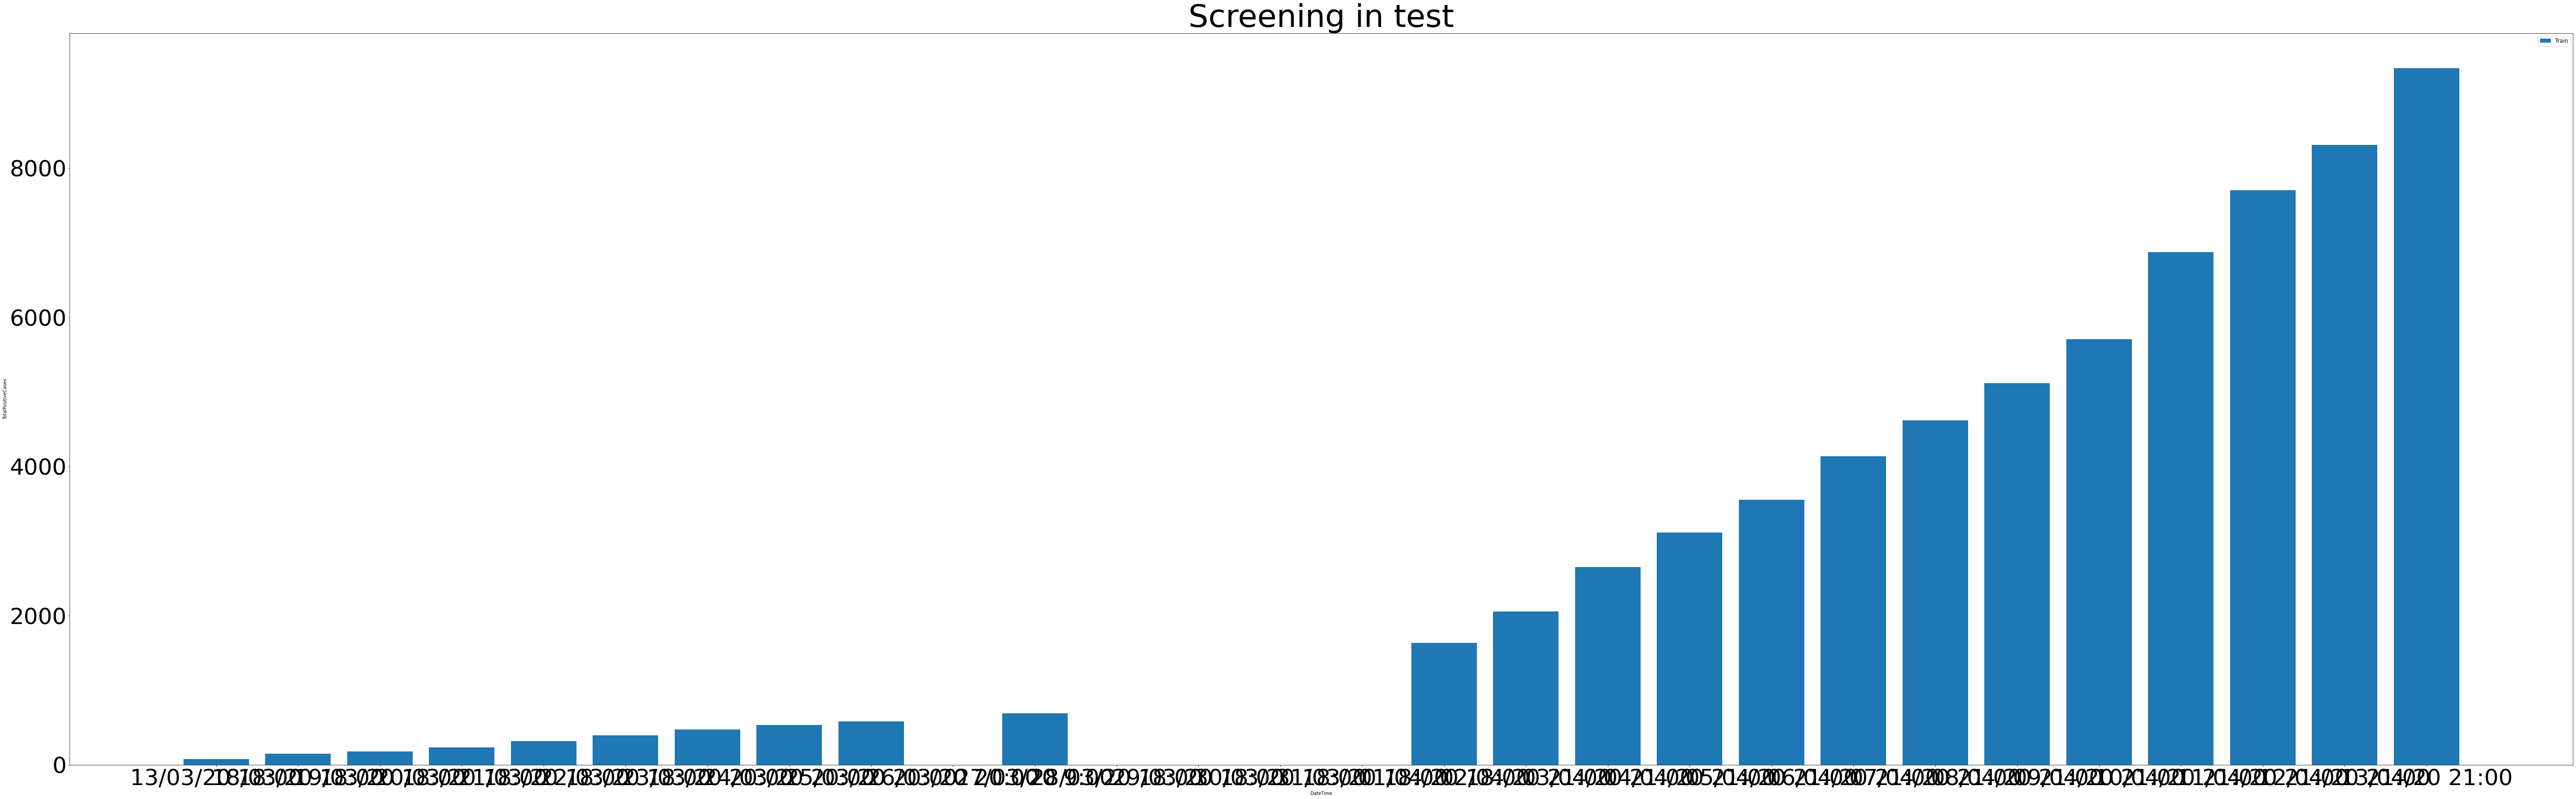

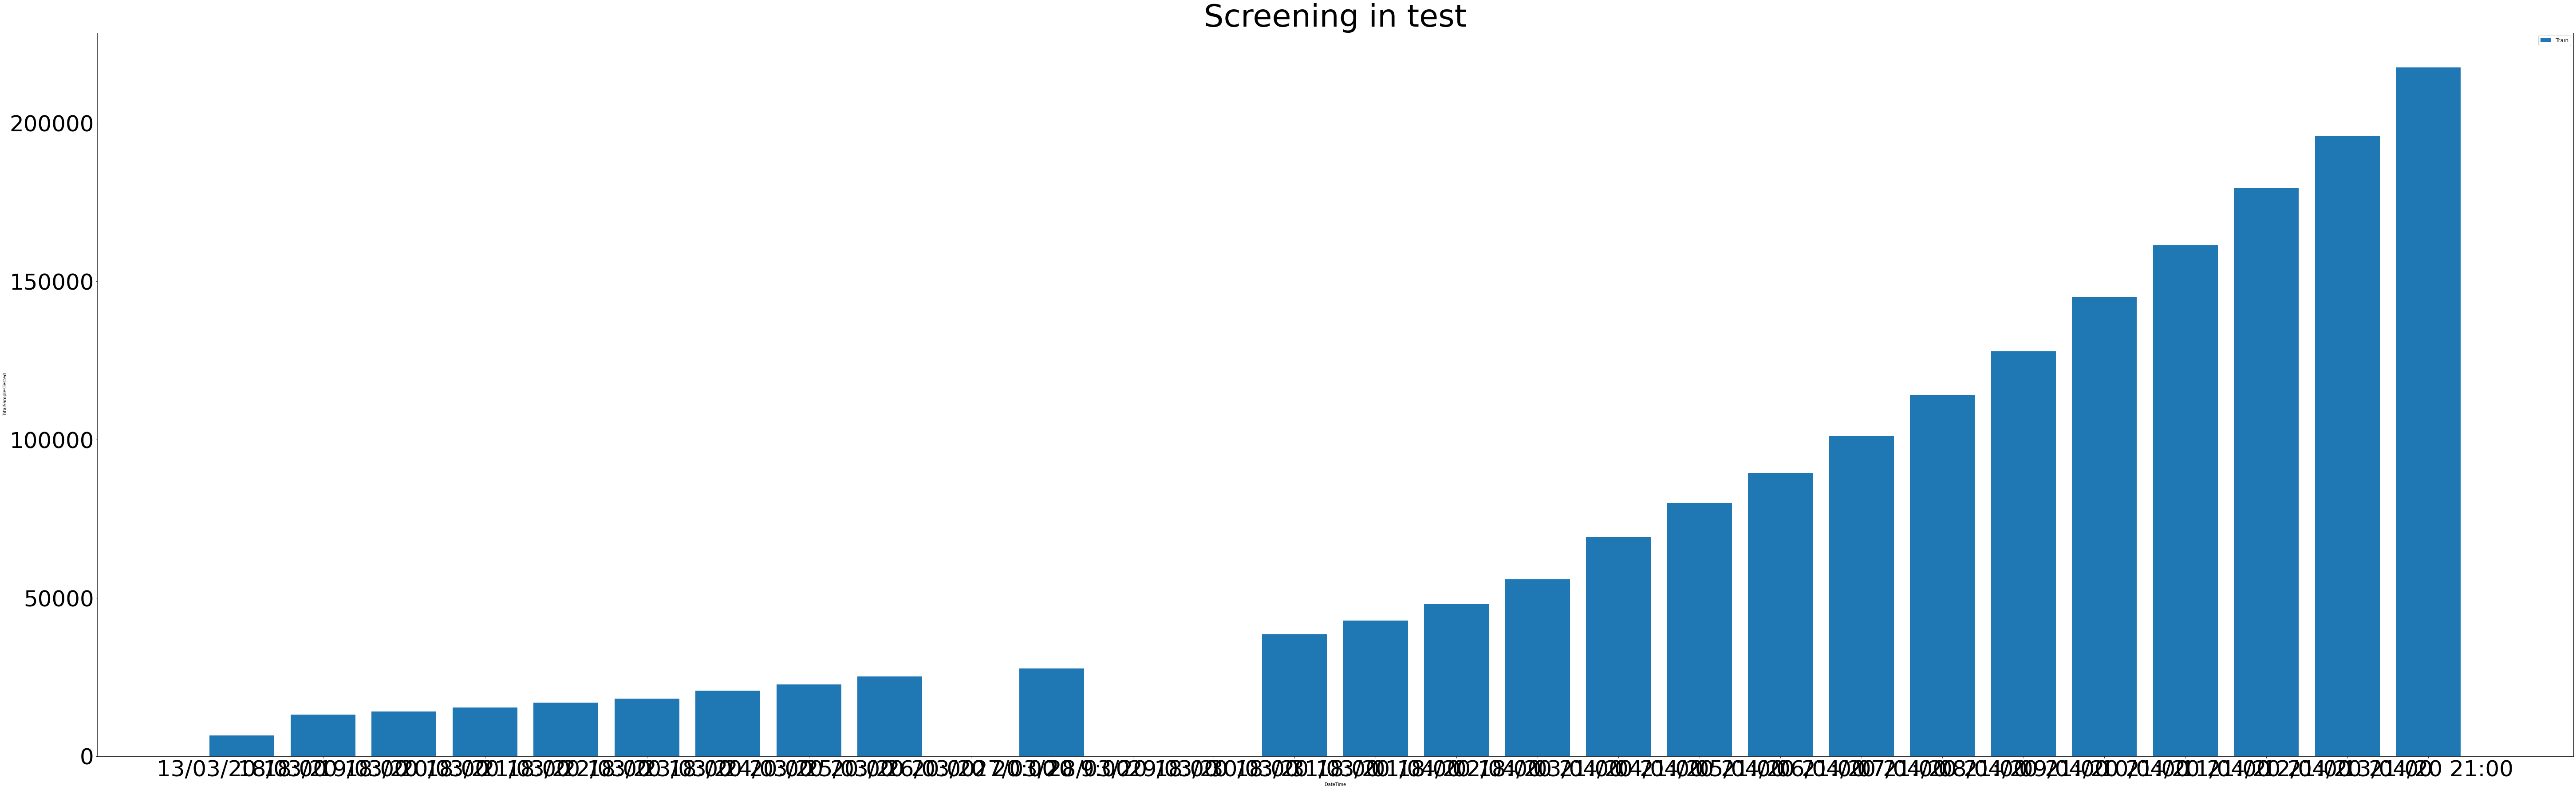

In [32]:
plt.figure(figsize=(100,30))
plt.bar(test.DateTime, test.TotalPositiveCases,label="Train")
plt.xlabel('DateTime')
plt.ylabel("TotalPositiveCases")
plt.xticks(fontsize=50)
plt.yticks(fontsize=50)
plt.title('Screening in test',fontsize=70)
plt.legend(frameon=True, fontsize=12)
plt.show()
plt.figure(figsize=(100,30))
plt.bar(test.DateTime, test.TotalSamplesTested,label="Train")
plt.xlabel('DateTime')
plt.ylabel("TotalSamplesTested")
plt.xticks(fontsize=50)
plt.yticks(fontsize=50)
plt.title('Screening in test',fontsize=70)
plt.legend(frameon=True, fontsize=12)
plt.show()

In [33]:
data=pd.read_csv('/kaggle/input/covid19-in-india/covid_19_india.csv',parse_dates=['Date'])
data.head()

,Sno,Date,Time,State/UnionTerritory,ConfirmedIndianNational,ConfirmedForeignNational,Cured,Deaths,Confirmed
0,1,2020-01-30,6:00 PM,Kerala,1,0,0,0,1
1,2,2020-01-31,6:00 PM,Kerala,1,0,0,0,1
2,3,2020-01-02,6:00 PM,Kerala,2,0,0,0,2
3,4,2020-02-02,6:00 PM,Kerala,3,0,0,0,3
4,5,2020-03-02,6:00 PM,Kerala,3,0,0,0,3


In [34]:
data.tail(10)

,Sno,Date,Time,State/UnionTerritory,ConfirmedIndianNational,ConfirmedForeignNational,Cured,Deaths,Confirmed
949,950,2020-04-14,5:00 PM,Odisha,-,-,18,1,55
950,951,2020-04-14,5:00 PM,Puducherry,-,-,1,0,7
951,952,2020-04-14,5:00 PM,Punjab,-,-,14,12,176
952,953,2020-04-14,5:00 PM,Rajasthan,-,-,133,3,879
953,954,2020-04-14,5:00 PM,Tamil Nadu,-,-,58,11,1173
954,955,2020-04-14,5:00 PM,Telengana,-,-,100,17,624
955,956,2020-04-14,5:00 PM,Tripura,-,-,0,0,2
956,957,2020-04-14,5:00 PM,Uttarakhand,-,-,7,0,35
957,958,2020-04-14,5:00 PM,Uttar Pradesh,-,-,49,5,657
958,959,2020-04-14,5:00 PM,West Bengal,-,-,36,7,190


In [35]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 959 entries, 0 to 958
Data columns (total 9 columns):
Sno                         959 non-null int64
Date                        959 non-null datetime64[ns]
Time                        959 non-null object
State/UnionTerritory        959 non-null object
ConfirmedIndianNational     959 non-null object
ConfirmedForeignNational    959 non-null object
Cured                       959 non-null int64
Deaths                      959 non-null int64
Confirmed                   959 non-null int64
dtypes: datetime64[ns](1), int64(4), object(4)
memory usage: 67.6+ KB


In [36]:
print(f"Earliest Entry:{data['Date'].min()}")
print(f"Last Entry:{data['Date'].max()}")
print(f"Total Days: {data['Date'].max()-data['Date'].min()}")

Earliest Entry:2020-01-02 00:00:00
Last Entry:2020-12-04 00:00:00
Total Days: 337 days 00:00:00


In [37]:
data.rename(columns={'Date':'date',
                    'Sno':'sno',
                     'State/UnionTerritory':'state',
                     'ConfirmedIndianNational':'CIN',
                     'ConfirmedForeignNational':'CFN',
                     'Cured':'cured',
                     'Deaths':'deaths'
                    },inplace=True)
data.head()  

,sno,date,Time,state,CIN,CFN,cured,deaths,Confirmed
0,1,2020-01-30,6:00 PM,Kerala,1,0,0,0,1
1,2,2020-01-31,6:00 PM,Kerala,1,0,0,0,1
2,3,2020-01-02,6:00 PM,Kerala,2,0,0,0,2
3,4,2020-02-02,6:00 PM,Kerala,3,0,0,0,3
4,5,2020-03-02,6:00 PM,Kerala,3,0,0,0,3


In [38]:
data.drop(columns=['sno'],axis=1,inplace=True)

In [39]:

data['Cases']=data['cured']+data['deaths']
data['Active Cases']=data['Confirmed']-data['Cases']



In [40]:
data.head(20)


,date,Time,state,CIN,CFN,cured,deaths,Confirmed,Cases,Active Cases
0,2020-01-30,6:00 PM,Kerala,1,0,0,0,1,0,1
1,2020-01-31,6:00 PM,Kerala,1,0,0,0,1,0,1
2,2020-01-02,6:00 PM,Kerala,2,0,0,0,2,0,2
3,2020-02-02,6:00 PM,Kerala,3,0,0,0,3,0,3
4,2020-03-02,6:00 PM,Kerala,3,0,0,0,3,0,3
5,2020-04-02,6:00 PM,Kerala,3,0,0,0,3,0,3
6,2020-05-02,6:00 PM,Kerala,3,0,0,0,3,0,3
7,2020-06-02,6:00 PM,Kerala,3,0,0,0,3,0,3
8,2020-07-02,6:00 PM,Kerala,3,0,0,0,3,0,3
9,2020-08-02,6:00 PM,Kerala,3,0,0,0,3,0,3


In [41]:
data.tail(20)

,date,Time,state,CIN,CFN,cured,deaths,Confirmed,Cases,Active Cases
939,2020-04-14,5:00 PM,Jharkhand,-,-,0,2,24,2,22
940,2020-04-14,5:00 PM,Karnataka,-,-,65,9,258,74,184
941,2020-04-14,5:00 PM,Kerala,-,-,198,3,379,201,178
942,2020-04-14,5:00 PM,Ladakh,-,-,10,0,15,10,5
943,2020-04-14,5:00 PM,Madhya Pradesh,-,-,51,50,730,101,629
944,2020-04-14,5:00 PM,Maharashtra,-,-,229,160,2337,389,1948
945,2020-04-14,5:00 PM,Manipur,-,-,1,0,2,1,1
946,2020-04-14,5:00 PM,Meghalaya,-,-,0,0,1,0,1
947,2020-04-14,5:00 PM,Mizoram,-,-,0,0,1,0,1
948,2020-04-14,5:00 PM,Nagaland,-,-,0,0,1,0,1


In [42]:
data['Confirmed'].sum()

85987

In [43]:
data['deaths'].sum()

2467

In [44]:
data['cured'].sum()

7424

In [45]:
x=data.groupby('state')['Active Cases'].sum().sort_values(ascending=False).to_frame()
x.style.background_gradient(cmap='Blues')

,Active Cases
state,
Maharashtra,13869
Delhi,9489
Tamil Nadu,9196
Rajasthan,5639
Kerala,4989
Telengana,4940
Uttar Pradesh,4746
Madhya Pradesh,3883
Andhra Pradesh,3859


In [46]:
x=data.groupby('state')['deaths'].sum().sort_values(ascending=False).to_frame()
x.style.background_gradient(cmap='Blues')

,deaths
state,
Maharashtra,1007
Madhya Pradesh,271
Gujarat,236
Delhi,174
Punjab,121
Telengana,116
Karnataka,94
Tamil Nadu,87
West Bengal,69


In [47]:
fig=px.bar(data.sort_values('deaths',ascending=False).sort_values('deaths',ascending=True),x="deaths",y="state",title='Total Deaths Cases',text='deaths',orientation='h',width=1000,height=700,range_x=[0,max(data['deaths'])])
fig.update_traces(marker_color='#55ff45',opacity=0.8,textposition='inside')
fig.update_layout(plot_bgcolor='rgb(245,242,242)')
fig.show()

In [48]:
fig=px.bar(data.sort_values('Active Cases',ascending=False).sort_values('Active Cases',ascending=True),x="deaths",y="state",title='Total Active Cases',text='deaths',orientation='h',width=1000,height=700,range_x=[0,max(data['Active Cases'])])
fig.update_traces(marker_color='#55ff45',opacity=0.8,textposition='inside')
fig.update_layout(plot_bgcolor='rgb(245,242,242)')
fig.show()

In [49]:
fig=px.bar(data.sort_values('cured',ascending=False).sort_values('cured',ascending=True),x="cured",y="state",title='Total cured Cases',text='cured',orientation='h',width=1000,height=700,range_x=[0,max(data['deaths'])])
fig.update_traces(marker_color='#55ff45',opacity=0.8,textposition='inside')
fig.update_layout(plot_bgcolor='rgb(245,242,242)')
fig.show()

In [50]:
#latest
latest=data[data['date']==max(data['date'])].reset_index()
Kerala_latest=latest[latest['state']=='Kerala']
row_latest=latest[latest['state']!='Kerala']
#latest condensed
latest_grouped=latest.groupby('state')['cured','deaths','Confirmed','Active Cases'].sum().reset_index()
Kerala_latest_grouped=Kerala_latest.groupby('state')['cured','deaths','Confirmed','Active Cases'].sum().reset_index()
row_latest_grouped=row_latest.groupby('state')['cured','deaths','Confirmed','Active Cases'].sum().reset_index()
#latest Complete Data
temp=data.groupby(['state'])['cured','deaths','Confirmed','Active Cases'].max()
temp=data.groupby('date')['cured','deaths','Confirmed','Active Cases'].sum().reset_index()
temp=temp[temp['date']==max(temp['date'])].reset_index(drop=True)
temp.style.background_gradient(cmap='Pastel1')



,date,cured,deaths,Confirmed,Active Cases
0,2020-12-04 00:00:00,765,273,8447,7409


In [51]:
temp=data.groupby(['state'])['cured','deaths','Active Cases'].max()
temp=data.groupby('date')['cured','deaths','Active Cases'].sum().reset_index()
temp=temp[temp['date']==min(temp['date'])].reset_index(drop=True)
temp.style.background_gradient(cmap='Pastel1')

,date,cured,deaths,Active Cases
0,2020-01-02 00:00:00,0,0,2


In [52]:
temp_1=latest_grouped.sort_values(by='deaths',ascending=False)
temp_1=temp_1.reset_index(drop=True)
temp_1.style.background_gradient(cmap='Blues')

,state,cured,deaths,Confirmed,Active Cases
0,Maharashtra,208,127,1761,1426
1,Madhya Pradesh,0,36,564,528
2,Gujarat,44,22,432,366
3,Delhi,25,19,1069,1025
4,Punjab,5,11,151,135
5,Tamil Nadu,44,10,969,915
6,Telengana,43,9,504,452
7,Karnataka,37,6,226,183
8,Andhra Pradesh,11,6,381,364
9,West Bengal,19,5,134,110


In [53]:
India_coor.head()

,state,lat,long,Unnamed: 3
0,Andaman And Nicobar,11.667026,92.735983,NaN
1,Andhra Pradesh,14.750429,78.570026,NaN
2,Arunachal Pradesh,27.100399,93.616601,NaN
3,Assam,26.749981,94.216667,NaN
4,Bihar,25.785414,87.479973,NaN


In [54]:
data_full=pd.merge(data,India_coor,on='state')
data_full

,date,Time,state,CIN,CFN,cured,deaths,Confirmed,Cases,Active Cases,lat,long,Unnamed: 3
0,2020-01-30,6:00 PM,Kerala,1,0,0,0,1,0,1,8.900373,76.569993,NaN
1,2020-01-31,6:00 PM,Kerala,1,0,0,0,1,0,1,8.900373,76.569993,NaN
2,2020-01-02,6:00 PM,Kerala,2,0,0,0,2,0,2,8.900373,76.569993,NaN
3,2020-02-02,6:00 PM,Kerala,3,0,0,0,3,0,3,8.900373,76.569993,NaN
4,2020-03-02,6:00 PM,Kerala,3,0,0,0,3,0,3,8.900373,76.569993,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
660,2020-10-04,5:00 PM,Gujarat,-,-,26,17,241,43,198,22.258700,71.192400,NaN
661,2020-11-04,5:00 PM,Gujarat,-,-,31,19,308,50,258,22.258700,71.192400,NaN
662,2020-12-04,5:00 PM,Gujarat,-,-,44,22,432,66,366,22.258700,71.192400,NaN
663,2020-04-13,5:00 PM,Gujarat,-,-,47,26,539,73,466,22.258700,71.192400,NaN


In [55]:
temp=data_full.groupby('date')['cured','deaths','Active Cases'].sum().reset_index()
temp=temp.melt(id_vars='date',value_vars=['cured','deaths','Active Cases'],var_name='Case',value_name='Count')

temp.head()
fig=px.area(temp,x="date",y="Count",color="Case",title="Cases Over Time",color_discrete_sequence=['#ffeebb',"#2367ff","#556677"])
fig.update_layout(xaxis_rangeslider_visible=True)
fig.show()

In [56]:
import folium
data_full=pd.merge(India_coor,data,on='state')
map=folium.Map(locations=[20,80],zoom_start=3.5,tiles='Stamen Toner')
for lat,lon,value,name in zip (data_full['lat'],data_full['long'],data_full['Active Cases'],data_full['state']):
    folium.CircleMarker([lat,lon],radius=value*0.3,popup=('<strong>State</strong>:'+str(name).capitalize() + '<br>''<strong>Active Cases</strong>:'+str(value)+'<br>'),color='blue',fill_color='blue',fill_opacity=0.3).add_to(map)
map


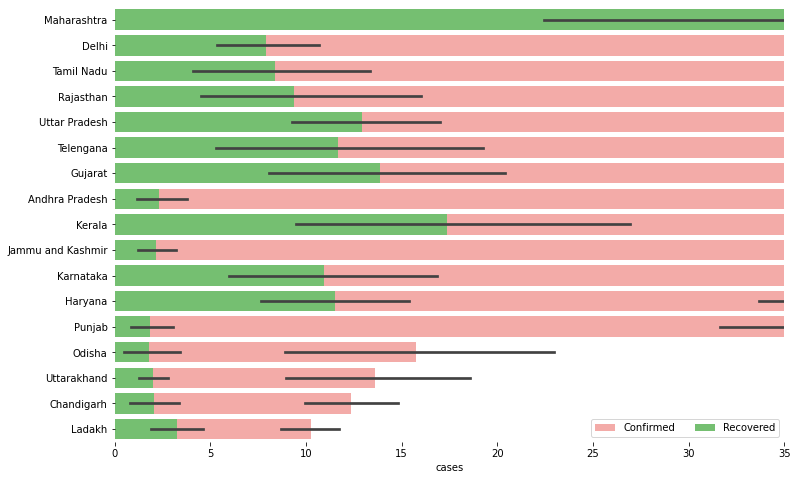

In [57]:
import seaborn as sns
f,ax=plt.subplots(figsize=(12,8))
data=data_full[['state','Confirmed','cured','deaths']]
data.sort_values('Confirmed',ascending=False,inplace=True)
sns.set_color_codes("pastel")
sns.barplot(x="Confirmed",y="state",data=data,label="Confirmed",color="r")
sns.set_color_codes("muted")
sns.barplot(x='cured',y='state',data=data,label="Recovered",color="g")
ax.legend(ncol=2,loc="lower right",frameon=True)
ax.set(xlim=(0,35),ylabel="",xlabel="cases")
sns.despine(left=True,bottom=True)

In [58]:
fig=go.Figure()
fig.add_trace(go.Scatter(x=dbd_India['Date'],y=dbd_India['Total Cases'],mode='lines+markers',name='Total Cases'))
fig.add_trace(go.Scatter(x=dbd_India['Date'],y=dbd_India['Recovered'],mode='lines',name='Recovered'))
fig.add_trace(go.Scatter(x=dbd_India['Date'],y=dbd_India['Active'],mode='lines',name='Active'))
fig.add_trace(go.Scatter(x=dbd_India['Date'],y=dbd_India['Deaths'],mode='lines',name='Deaths'))
fig.update_layout(title_text="Trend of Coronavirus Cases in India(Cumulative cases)",plot_bgcolor='rgb(250,242,242)')
fig.show()
fig=px.bar(dbd_India,x="Date",y="New Cases",barmode='group',height=400)
fig.update_layout(title_text='New Coronavirus Cases in India per day',plot_bgcolor='rgb(250,242,242)')
fig.show()


In [59]:
fig=px.bar(dbd_Italy,x="Date",y="Total Cases",color='Total Cases',orientation='v',height=600,title='Confirmed Cases in Italy',color_discrete_sequence=px.colors.cyclical.mygbm)
fig.update_layout(plot_bgcolor='rgb(250,242,242)') 
fig.show()
fig=px.bar(dbd_Korea,x="Date",y="Total Cases",color='Total Cases',orientation='v',height=600,title='Confirmed Cases in Korea',color_discrete_sequence=px.colors.cyclical.mygbm)
                                      
                                                                                            

fig.update_layout(plot_bgcolor='rgb(250,242,242)')
fig.show()
fig=px.bar(dbd_India,x="Date",y="Total Cases",color='Total Cases',orientation='v',height=600,title='Confirmed Cases in India',color_discrete_sequence=px.colors.cyclical.mygbm)

fig.update_layout(plot_bgcolor='rgb(250,242,242)')
fig.show()


In [60]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots
fig=make_subplots(
    rows=2,cols=2,specs=[[{},{}],[{"colspan":2},None]],subplot_titles=("S.Korea","Italy","India"))
fig.add_trace(go.Bar(x=dbd_Korea['Date'],y=dbd_Korea['Total Cases'],marker=dict(color=dbd_Korea['Total Cases'],coloraxis="coloraxis")),1,1)
fig.add_trace(go.Bar(x=dbd_India['Date'],y=dbd_India['Total Cases'],marker=dict(color=dbd_India['Total Cases'],coloraxis="coloraxis")),1,2)
fig.add_trace(go.Bar(x=dbd_Italy['Date'],y=dbd_Italy['Total Cases'],marker=dict(color=dbd_Italy['Total Cases'],coloraxis="coloraxis")),2,1)
fig.update_layout(coloraxis=dict(colorscale="Bluered_r"),showlegend=False,title_text="Total Confirmed cases(Cumulative)")
fig.update_layout(plot_bgcolor='rgb(250,242,242)')
fig.show()



In [61]:
title='Main Source for News'
labels=['Korea','Italy','India']
colors=['rgb(0,128,0)','rgb(255,0,0)','rgb(49,130,189)']
mode_size=[8,8,12]
line_size=[2,2,4]
fig=go.Figure()
fig.add_trace(go.Scatter(x=dbd_Korea['Days after surpassing 100 cases'],y=dbd_Korea['Total Cases'],mode='lines',name=labels[0],line=dict(color=colors[0],width=line_size[0]),connectgaps=True))
fig.add_trace(go.Scatter(x=dbd_India['Days after surpassing 100 cases'],y=dbd_India['Total Cases'],mode='lines',name=labels[2],line=dict(color=colors[2],width=line_size[0]),connectgaps=True))
fig.add_trace(go.Scatter(x=dbd_Italy['Days after surpassing 100 cases'],y=dbd_Italy['Total Cases'],mode='lines',name=labels[1],line=dict(color=colors[1],width=line_size[0]),connectgaps=True))
annotations=[]
annotations.append(dict(xref='paper',yref='paper',x=0.5,y=-0.1,xanchor='center',yanchor='top',text='Days after surpassing 100 cases',font=dict(family='Arial',size=12,color='rgb(150,150,150)'),showarrow=False))
fig.update_layout(annotations=annotations,plot_bgcolor='white',yaxis_title='Cummulative cases')
fig.show()



In [62]:
fig=px.bar(data.sort_values('deaths',ascending=False).head(25).sort_values('deaths',ascending=True),x="deaths",y="state",title="Deaths",text='deaths',orientation='h',width=700,height=700,range_x=[0,max(data['deaths'])+500])
fig.update_traces(marker_color='#ff1e56',opacity=0.8,textposition='outside')
fig.show()

In [63]:
fig=px.bar(data.sort_values('cured',ascending=False).head(25).sort_values('cured',ascending=True),x="cured",y="state",title="cured",text='cured',orientation='h',width=700,height=700,range_x=[0,max(data['cured'])+500])
fig.update_traces(marker_color='#ff1e56',opacity=0.8,textposition='outside')
fig.show()

In [64]:
fig=px.bar(data.sort_values('Confirmed',ascending=False).head(25).sort_values('Confirmed',ascending=True),x="Confirmed",y="state",title="Confirmed",text='Confirmed',orientation='h',width=700,height=700,range_x=[0,max(data['Confirmed'])+500])
fig.update_traces(marker_color='#ff1e56',opacity=0.8,textposition='outside')
fig.show()

In [65]:
fig=px.bar(data_full.sort_values('Active Cases',ascending=False).head(25).sort_values('Active Cases',ascending=True),x="Active Cases",y="state",title="Active Cases",text='Active Cases',orientation='h',width=700,height=700,range_x=[0,max(data_full['Active Cases'])+500])
fig.update_traces(marker_color='#ff1e56',opacity=0.8,textposition='outside')
fig.show()